## Some notes

The **F-statistic** is used when number of predictors $p$ is large, or larger than the observation points $n$, so $p>n$. This is useful since the p-value is not enough when we have a large number of predictors, because it is very likely that 5% of the predictors will have a small (acceptable) p-value by chance. The F-statistic eliminates this dependence on the number of predictors and if its associated p-value is low, the probability of that happening when it is not true is very low (5%). (page 86)

In page 92, since the p-value of the predictor is already high on its own, this is sufficient to remove it from our analysis. 

**Collinearity** is when two or more predictors are closely related to one another. This results in the following:

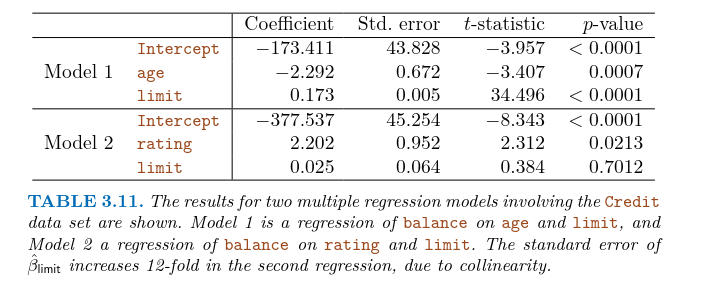

Here the predictors `rating` and `limit` are collinear. If you're looking at Model 2 alone, you may think that `limit` passes the null hypothesis due to its large p-value, but that is not true. As such, we say that collinearity reduces the *power* of the hypothesis test, i.e. the probability of correctly detecting a non-zero coefficient. The root cause of this is the uncertainty in the coefficient estimates that result from how close the contour of RSS is (page 107), which lead to a higher RSE overall. 

Another perspective is that the collinearity between the `rating` and `limit` predictors implies that we only need one variable in our model, since they carry the same information about how the response is affected by them. Therefore a simple solution to solve this collinearity problem is to drop one of the predictors.

## Lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

from statsmodels.stats.anova import anova_lm

In [4]:
# Lab specific imports
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [5]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'plt',
 'poly',
 'quit',
 'sm',
 'summarize']

In [6]:
Boston = load_data("Boston")
list(Boston.columns)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'medv']

In [7]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [8]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [10]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [11]:
new_df = pd.DataFrame({'lstat': np.linspace(0, 20, 100)})
design = MS(['lstat'])
design = design.fit(Boston)
newX = design.transform(new_df)

r = results.get_prediction(newX)

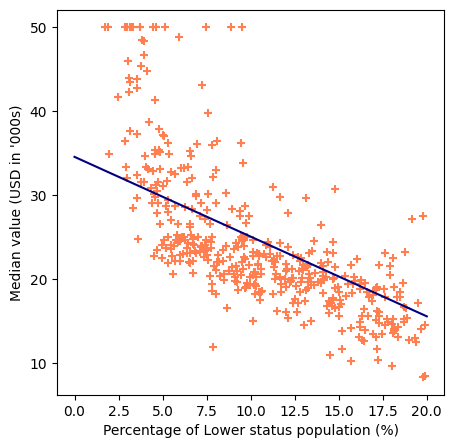

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
original_medv = [Boston.medv[i] for i, ls in enumerate(Boston.lstat) if ls >= 0 and ls <= 20]
original_lstat = [ls for ls in Boston.lstat if ls >= 0 and ls <= 20]
ax.plot(newX.lstat, r.predicted, c='navy');
ax.scatter(original_lstat, original_medv, c='coral', marker='+');
ax.set_xlabel('Percentage of Lower status population (%)');
ax.set_ylabel("Median value (USD in '000s)");

There is some non-linearity in the graph above, let us investigate further by plotting residuals of the fit.

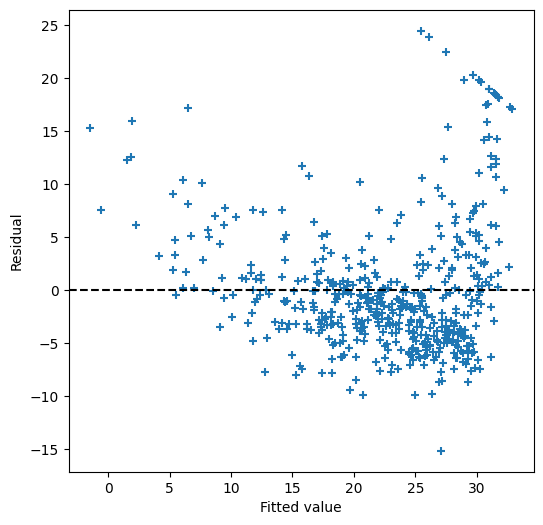

In [13]:
fig, ax = plt.subplots(figsize=(6,6));
ax.scatter(results.fittedvalues, results.resid, marker='+')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

np.int64(374)

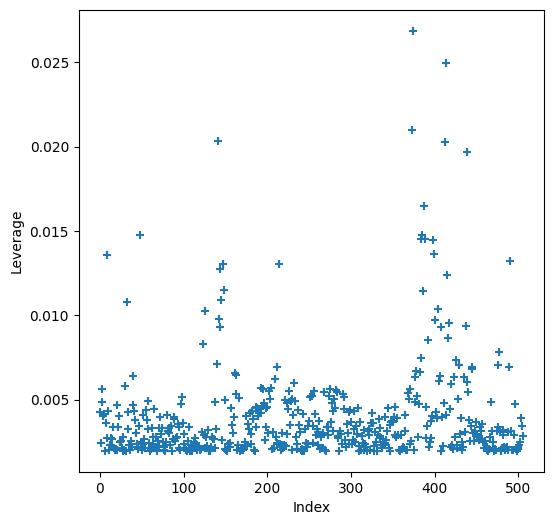

In [14]:
infl = results.get_influence()
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, marker='+')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [15]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summary = summarize(results1)
summary

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [16]:
summary['P>|t|'].age*100

np.float64(0.5)

Now we use all the columns in Boston as our predictors

In [17]:
terms = Boston.columns.drop('medv')
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [18]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [19]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [20]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [21]:
p = poly('lstat', degree=2)

In [22]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [23]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


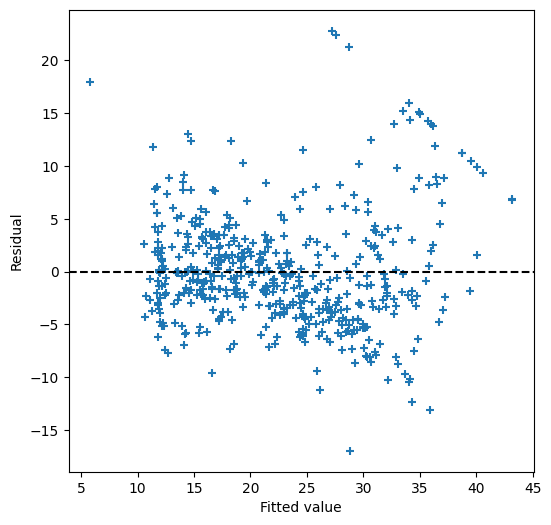

In [24]:
fig, ax = plt.subplots(figsize=(6,6));
ax.scatter(results3.fittedvalues, results3.resid, marker='+');
ax.set_xlabel('Fitted value');
ax.set_ylabel('Residual');
ax.axhline(0, c='k', ls='--');

How do we get the prediction of such a result using results.get_prediction()? what do we feed the function?

In [25]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [26]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

range_lstat = np.linspace(np.min(Boston.lstat), np.max(Boston.lstat), 100)

# Create raw polynomial features (not orthogonal)
poly = PolynomialFeatures(degree=2, include_bias=True)
X = poly.fit_transform(Boston[['lstat']])  # X = [1, lstat, lstat²]
model = sm.OLS(y, X)
results = model.fit()

X_pred = poly.transform(pd.DataFrame({'lstat': range_lstat}))
pred_values = results.predict(X_pred)

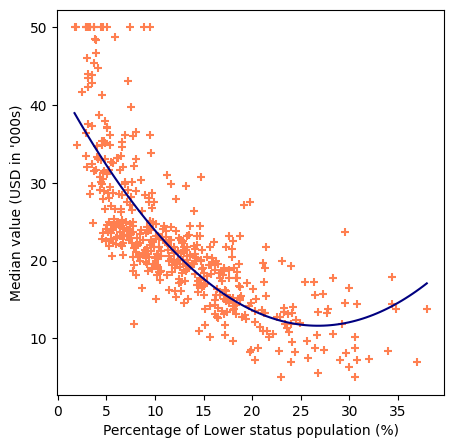

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
original_medv = Boston.medv
original_lstat = Boston.lstat
ax.plot(range_lstat, pred_values, c='navy');
ax.scatter(original_lstat, original_medv, c='coral', marker='+');
ax.set_xlabel('Percentage of Lower status population (%)');
ax.set_ylabel("Median value (USD in '000s)");

In conclusion, ditch the ISLP package, just use SKlearn since thats what youll be using at work / future projects in any case.

### Exercises

#### (1)

$$ Y = \beta_0 + \beta_1\cdot\verb|TV| + \beta_2\cdot\verb|radio| + \beta_3\cdot\verb|newspaper|$$
$$ H_0: \beta_0 = \beta_1 = \beta_2 = \beta_3 = 0$$ 

What conclusions can you draw based on the p-values of table 3.4?

We can see that the $\verb|Intercept|$, $\verb|TV|$ and $\verb|radio|$ variables all have a very solid association between them and the response. On the other hand, $\verb|newspaper|$ has an extremely high p-value, so there is a very high probability that the coefficient of $\verb|newspaper|$ was observed due to the variance and noise of the data, and that the coefficient in reality is $=0$. This is because a high p-value is a result of a small t-statistic which is defined by:

$$ t = \frac{\hat{\beta_3}-0}{\text{SE}\left(\hat{\beta_3}\right)}$$

Therefore, a small t-statistic is a result of a coefficient close to 0, with some variance that makes it plausible (and in this case very likely) that the real coefficient $\beta_3 = 0$

#### (2)

LFL

#### (3)

(a)

i. Incorrect. $\beta_3 = 35$ which is "enabled" if the dummy variable level is set to 1 (for college). Therefore, College graduates earn more than Highschool graduates.

ii. True. Read above. 

#### This shit is wrong, redo, you should take the common terms of the interactions and rethink it again. 

iii. This may be plausible off of the coefficients. If the GPA of said highschool student is higher than that of the average by the amount $=35/20$ then it makes up for the $35$ points they lose by graduating from college.

iv. True.

(b) 
$$ Y = 50 + 20\cdot\verb|GPA| + 0.07\cdot\verb|IQ| + 35\cdot\verb|Level| + 0.01\cdot\verb|GPA|\cdot\verb|IQ| - 10\cdot\verb|GPA|\cdot\verb|Level| $$

In [28]:
y = 50 + 20*4 + 0.07*110 + 35*1 + 0.01*4*110 - 10*4*1
y

137.1

False. This is not enough to draw this conclusion as the variation of this coefficient may be very small, which results in a high t-statistic and therefore a small p-value. Indicating that this statement is false and there may be evidence of an interaction effect. The standard error must be known to form this hypothesis test and draw a valid trustworthy conclusion.

#### (4)

(a) We would expect the residual sum of the cubic regression to be lower as there are simply more predictors to match the noise of the data. Even though the true relationship is linear, the cubic regression matches the noise more which leads to a lower training residual sum. 

(b) Part (a) does not mean however that the cubic regression will have lower test RSS. This is not true. In reality, since the linear regression is the actual relationship between X and Y, the linear regression will result in the best test RSS possible (?). The cubic regression however has overfit the training data (since it matches the noise), and so will have a higher test RSS.

(c) The training RSS from the cubic regression will definitely be lower, this is both due to the nonlinear nature of the data and the cubic regression matching more closely to the data. The linear regression will not be enough to match even a simple quadratic relationship between Y and X.

(d) The cubic regression will have better test RSS since if we are sure that Y and X have a nonlinear relationship then at least one of $X^2$ or $X^3$ will have a very small p-value, resulting in a better model than simple linear regression.

#### (5)

Substitute $\hat{\beta}$ in the fitted value equation at the start of the problem. We get

$$ \hat{y_i} = \frac{x_i}{\sum_{j=1}^nx_{j}^2} \cdot \sum_{i'=1}^n x_{i'}y_{i'}$$

Note that the fraction on the left is a constant relative to the summation of $x_{i'}y_{i'}$. So we can insert it inside the integral. 

$$ \hat{y_i} = \sum_{i'=1}^n\left(\frac{x_i\cdot x_{i'}}{\sum_{j=1}^nx_j^2}\right) y_{i'}$$

$a_{i'}$ is the term inside the bracket. 

#### (6)

For simple linear regression, we have:
$$\hat{y_i}=\hat{\beta_0} + \hat{\beta_1}\cdot x_i$$
Substitute only $\hat{\beta_0}$ (3.4) in to the equation above to get:
$$\hat{y_i}=(\overline{y}-\hat{\beta_1}\overline{x})+ \hat{\beta_1}\cdot x_i$$

You might be wondering why we only substitute $\hat{\beta_0}$. This is because we simply treat $\hat{\beta_1}$ as a constant, as it consists of a fraction of two summations which do not matter in our goal here. Our goal is to substitute some value of $x_i$ and see if $\hat{y_i}$ is as expected, $\hat{\beta_1}$ is independent of both variables. Yes, it is even independent of $x_i$ since it is inside a summation, where all $x_i$'s are summed together after some operation is done on them. 

Substituting $x_i = \overline{x}$ we get:
$$\hat{y_i}=(\overline{y}-\hat{\beta_1}\overline{x})+ \hat{\beta_1}\cdot \overline{x}$$
$$\hat{y_i} = \overline{y}$$
Therefore our simple regression line always passes through $(\overline{x}, \overline{y})$

#### 7

$$Cor(X, Y) =\frac{\left(\sum_{i=1}^n(x_i)(y_i)\right)^2}{\sum(x_i^2)\sum(y_i^2)}$$

$$R^2 = \frac{TSS-RSS}{TSS}$$
$$RSS = \sum_{i=1}^n(y_i-\hat{y_i})^2$$
$$TSS = \sum_{i=1}^n(y_i-\overline{y_i})^2$$
$$R^2 = \frac{\sum_{i=1}^n(y_i-\overline{y_i})^2 - \sum_{i=1}^n(y_i-\hat{y_i})^2}{\sum_{i=1}^n(y_i-\overline{y_i})^2}$$

Sub $\overline{y_i} = 0$ 
$$R^2 = \frac{\sum_{i=1}^n(y_i)^2 - \sum_{i=1}^n(y_i-\hat{y_i})^2}{\sum_{i=1}^n(y_i)^2}$$

$$\hat{y_i} = \beta_0 + \beta_1\cdot x_i$$

$$R^2 = \frac{\sum_{i=1}^n(y_i)^2 - \sum_{i=1}^n(y_i-(\beta_0 + \beta_1 \cdot x_i))^2}{\sum_{i=1}^n(y_i)^2}$$

$$R^2 = \frac{\sum_{i=1}^n(y_i)^2 - \sum_{i=1}^n(y_i^2 -2 (\beta_0 + \beta_1 \cdot x_i)y_i + (\beta_0 + \beta_1x_i)^2)}{\sum_{i=1}^n(y_i)^2}$$

$$R^2 = \frac{-\sum_{i=1}^n(-2 (\beta_0 + \beta_1 \cdot x_i)y_i + (\beta_0 + \beta_1 x_i)^2)}{\sum_{i=1}^n(y_i)^2}$$

$$\beta_0 = \overline{y} - \beta_1\overline{x} = 0$$

$$R^2 = \frac{\sum_{i=1}^n(\beta_1 x_i)(2 y_i -\beta_1 x_i)}{\sum_{i=1}^n(y_i)^2}$$

$$R^2 = \frac{2\beta_1\sum_{i=1}^n(x_iy_i)-\beta_1^2\sum_{i=1}^n(x_i^2)}{\sum_{i=1}^n(y_i)^2}$$

Substitute (3.4) from the book and simplify to get:
$$ R^2 = \frac{2\sum((x_iy_i)^2)/\sum(x_i^2) - \sum((x_iy_i)^2)\sum(x_i^2)/(\sum(x_i^2))^2}{\sum(y_i^2)}$$

$$R^2 = \frac{\left(\sum_{i=1}^n(x_i)(y_i)\right)^2}{\sum(x_i^2)\sum(y_i^2)} = Cor^2(X, Y)$$

### Applied Problems

#### 8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Auto = pd.read_csv("Auto.csv", na_values='?')

In [3]:
Auto_without_nans = Auto.dropna()
y = Auto_without_nans.mpg
X = sm.add_constant(Auto_without_nans.horsepower) # Get present vals only
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        10:51:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. P-value of predictor is 0, so there is certainly a relationship between the predictor and the response

ii. Since the R^2 value is equal to the explained variance of the regression model divided by the total variance of the data, a value of 60% means that the regression explains 60% of the total variance in the data, telling us how strong the relationship is.

iii. Negative, we can see this in the following:

In [4]:
coef = results.params['horsepower']
coef >= 0

np.False_

In [5]:
predX = pd.DataFrame({'const': [1], 'horsepower': [98]})
pred = results.get_prediction(predX)
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Where the confidence interval is `[mean_ci_lower, mean_ci_upper]` and the prediction intervals are `[obs_ci_lower, obs_ci_upper]`

(b)

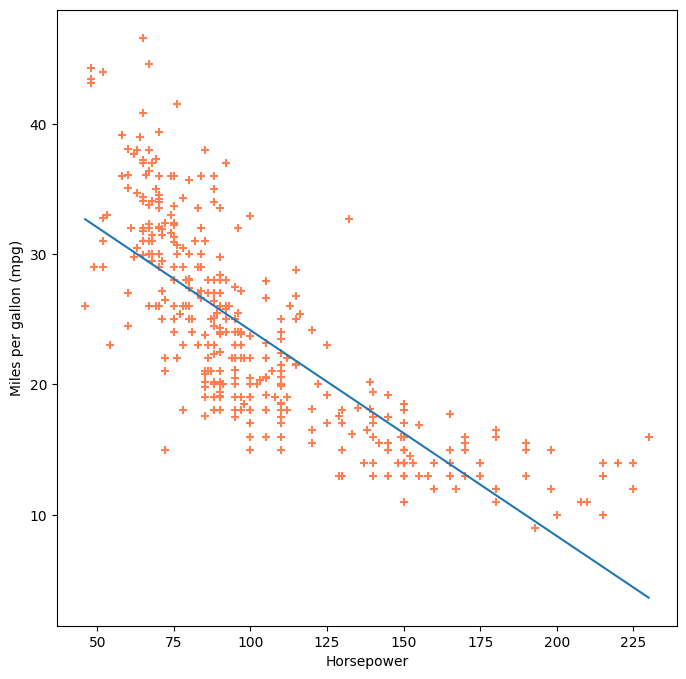

In [6]:
f, ax = plt.subplots(figsize=(8,8))

original_mpg = Auto_without_nans.mpg
original_hp = Auto_without_nans.horsepower

predX = [np.min(Auto_without_nans.horsepower), np.max(Auto_without_nans.horsepower)]
predX_wconst = sm.add_constant(predX)
r = results.get_prediction(predX_wconst).predicted

ax.plot(predX, r)


ax.scatter(original_hp, original_mpg, c='coral', marker='+');
ax.set_xlabel('Horsepower');
ax.set_ylabel("Miles per gallon (mpg)");

(c)

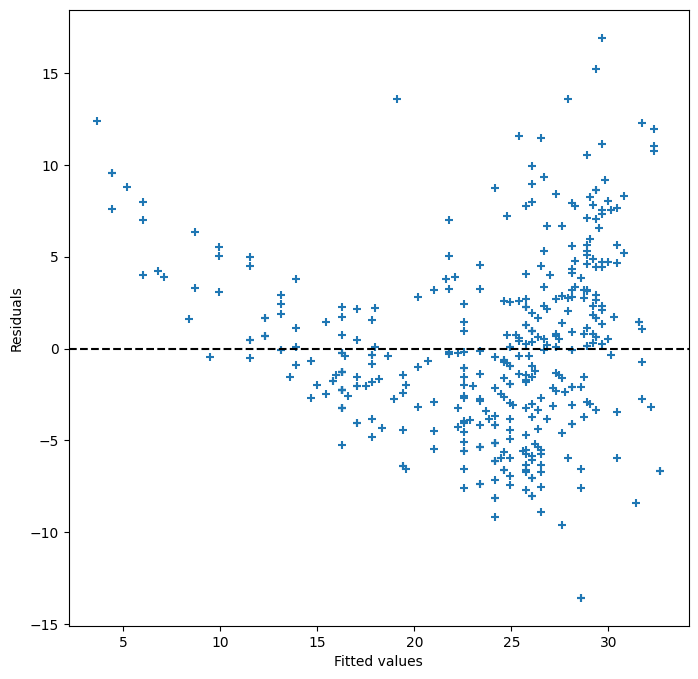

In [7]:
# Residual vs fitted values:
f, ax = plt.subplots(figsize=(8,8));
ax.scatter(results.fittedvalues, results.resid, marker='+');
ax.axhline(0, c='k', ls='--');
ax.set_xlabel('Fitted values');
ax.set_ylabel('Residuals');

We clearly see a pattern were the points are more concentrated where the fitted values are higher, and the residuals gently decline (almost like a linear line) at the left portion of the graph.

The presence of a pattern indicates nonlinearity.

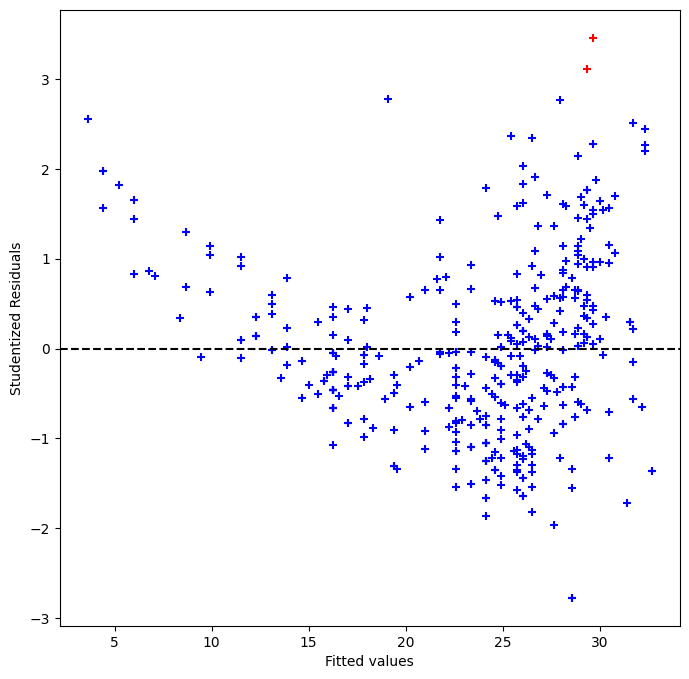

In [8]:
# Studentized residual
influence = results.get_influence();
studentized_resid = influence.get_resid_studentized_external()
ok = studentized_resid[studentized_resid < 3]
not_ok = studentized_resid[studentized_resid >= 3]

f, ax = plt.subplots(figsize=(8,8));
ax.scatter(results.fittedvalues[studentized_resid < 3], ok, marker='+', c='b');
ax.scatter(results.fittedvalues[studentized_resid >= 3], not_ok, marker='+', c='r');
ax.axhline(0, c='k', ls='--');
ax.set_xlabel('Fitted values');
ax.set_ylabel('Studentized Residuals');

We see that there are two possible outliers in the data set. Let's investigate further:

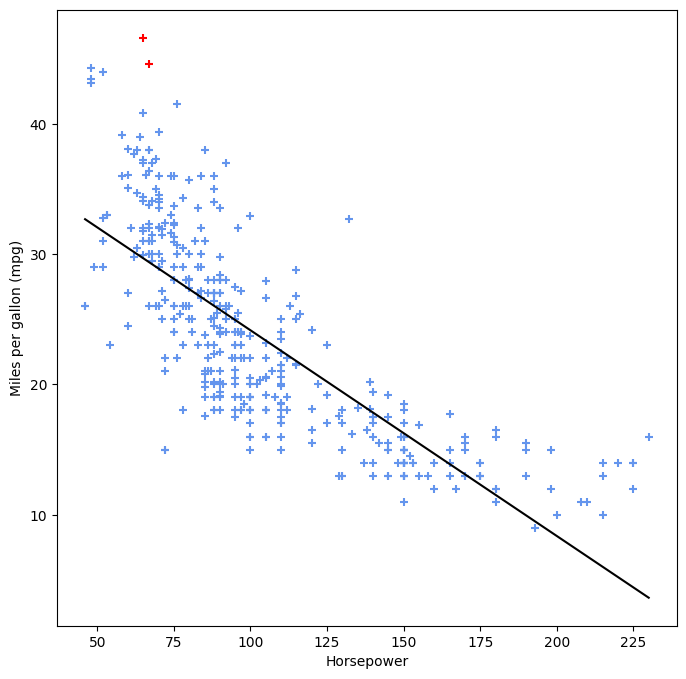

In [9]:
f, ax = plt.subplots(figsize=(8,8))

original_mpg = Auto_without_nans.mpg
original_hp = Auto_without_nans.horsepower

predX = [np.min(Auto_without_nans.horsepower), np.max(Auto_without_nans.horsepower)]
predX_wconst = sm.add_constant(predX)
r = results.get_prediction(predX_wconst).predicted

ax.plot(predX, r, c='k')


ax.scatter(original_hp[studentized_resid < 3], original_mpg[studentized_resid < 3]
           , c='cornflowerblue', marker='+');
ax.scatter(original_hp[studentized_resid >= 3], original_mpg[studentized_resid >=3]
           , c='red', marker='+');
ax.set_xlabel('Horsepower');
ax.set_ylabel("Miles per gallon (mpg)");

We see that these points are really pretty far from the regression line as the residual indicates. But this may be because of the nonlinearity of the data as the residual shows. Our model is not that good.

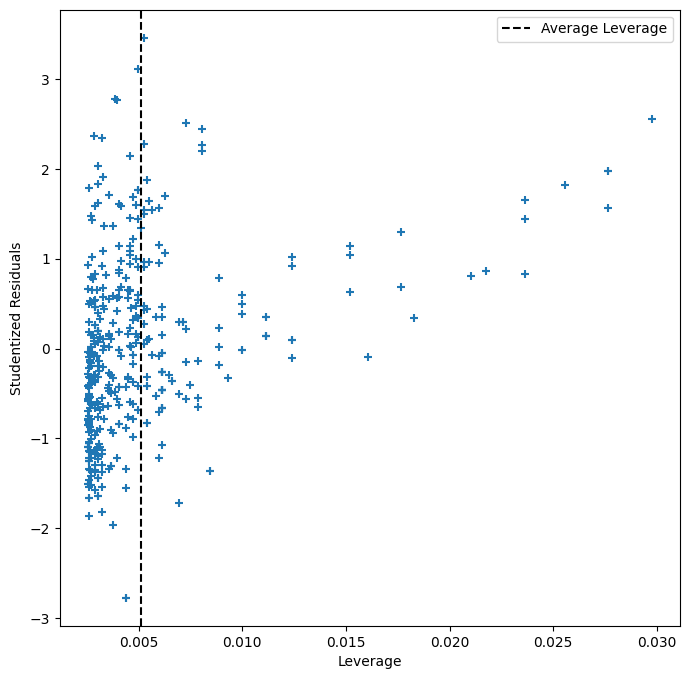

In [10]:
# Leverage
influence = results.get_influence();
f, ax = plt.subplots(figsize=(8,8));
ax.scatter(influence.hat_matrix_diag, studentized_resid, marker='+');
ax.set_xlabel("Leverage");
ax.set_ylabel("Studentized Residuals")
ax.axvline(2/X.shape[0], c='k', ls='--', label='Average Leverage');
ax.legend();

There's definitely very notable leverage in the data thats far away from the average. Not sure though how far away is too far. In other words, how much leverage is too much?


LFL. 

#### 9

/tmp/ipykernel_4883/499499643.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Auto, marker='.', ax=ax);


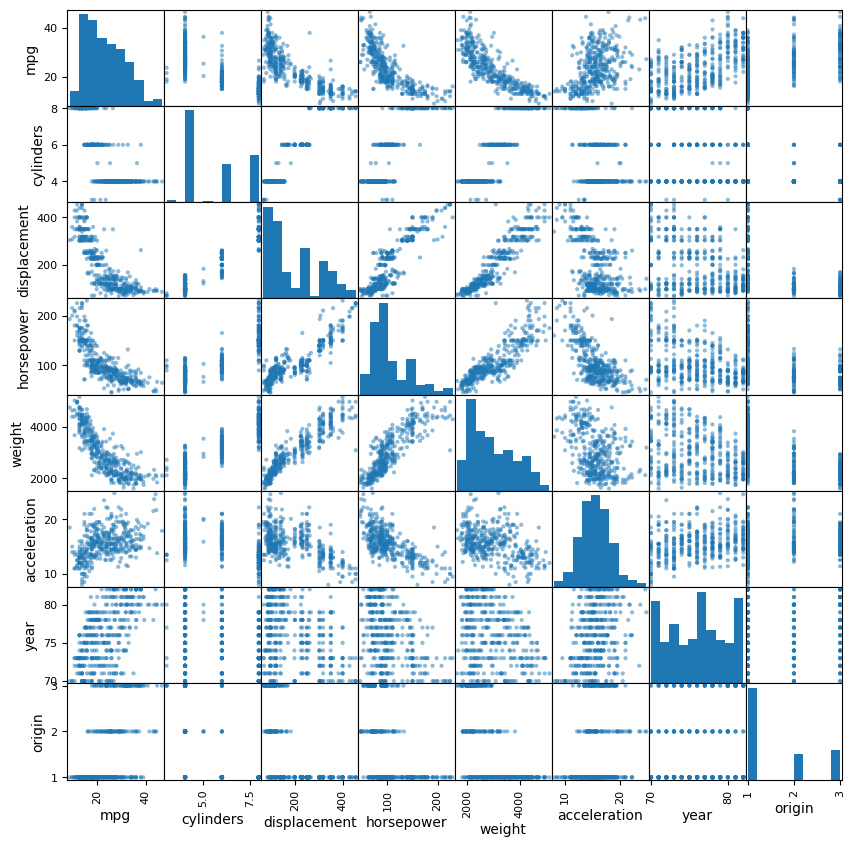

In [11]:
Auto = pd.read_csv("Auto.csv", na_values='?');
Auto = Auto.dropna()
f, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(Auto, marker='.', ax=ax);

In [12]:
Auto = Auto.set_index('name')

In [13]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [14]:
X = Auto[Auto.columns.drop('mpg')]
X = sm.add_constant(X)
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        10:51:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
import statsmodels.formula.api as smf

# Fit the model using a formula (adjust terms as needed)
model = smf.ols('mpg ~ ' + ' + '.join(Auto.columns.drop('mpg')), data=Auto)
results = model.fit()

# now run anova
from statsmodels.stats.api import anova_lm
anova_results = anova_lm(results)
print(anova_results)
results.summary()

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        10:51:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (d)

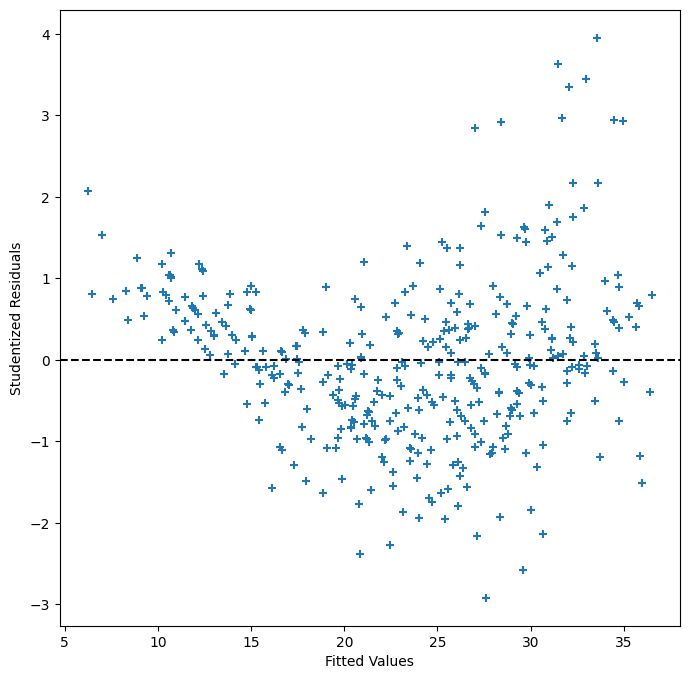

In [20]:
f, ax = plt.subplots(figsize=(8,8));
influence = results.get_influence();
ax.scatter(results.fittedvalues, influence.get_resid_studentized_external(), marker='+');
ax.axhline(0, c='k', ls='--');
ax.set_xlabel('Fitted Values');
ax.set_ylabel('Studentized Residuals');

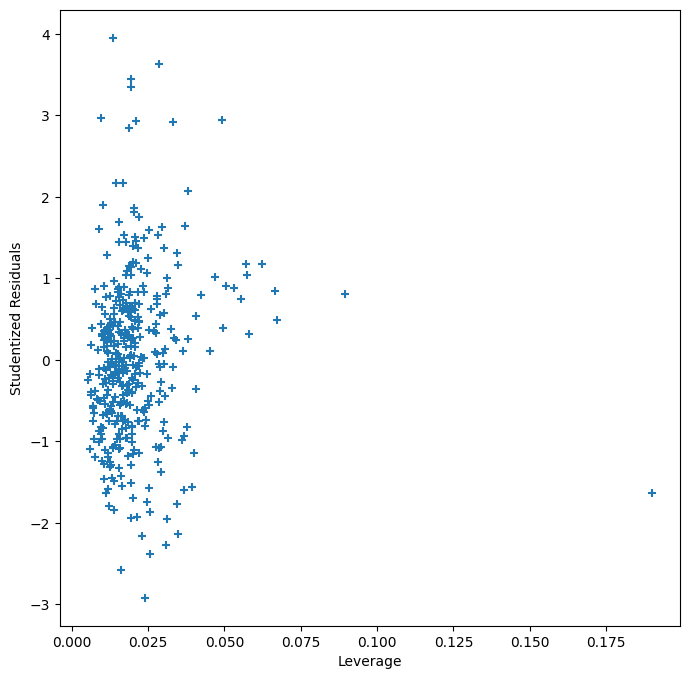

In [22]:
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(influence.hat_matrix_diag, influence.get_resid_studentized_external(), marker='+');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');

We see that there is a bunch of points in the Resid Vs Fitted values graph that exceed 3, which make us think that they are outliers. Moreover, in the Leverage graph theres especially one point that has extremely high leverage compared to the other points.

In [106]:
# While this might look like a good way to find all the interaction terms
# It is simply WRONG. In reality, you have keep adding interaction terms to
# your model, and when one is insignificant, remove it. In other words,
# you have to look at your model as a whole, because some interaction terms
# make others insignificant.
og_str = 'mpg ~ ' + ' + '.join(Auto.columns.drop('mpg'))
valid_interactions = {}
columns = list(Auto.columns.drop('mpg'))
for i in range(0, len(columns)-1):
    for j in range(i+1, len(columns)):
        model = sm.OLS.from_formula(og_str + ' + ' + \
                                    columns[i] + ':' + columns[j],
                                    data=Auto);
        results = model.fit()
        interaction_pvalue = results.pvalues.iat[-1]
        if interaction_pvalue*100 < 1:
            valid_interactions[columns[i]+":"+columns[j]] =  interaction_pvalue 

In [110]:
og_str

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [111]:
# Again, these arent really correct.
valid_interactions

{'cylinders:displacement': np.float64(2.8367085448103682e-14),
 'cylinders:horsepower': np.float64(2.9091695813662834e-23),
 'cylinders:weight': np.float64(5.497862595034078e-18),
 'cylinders:acceleration': np.float64(2.2546187358788863e-06),
 'cylinders:year': np.float64(3.595860511067904e-10),
 'displacement:horsepower': np.float64(3.3865186652638906e-24),
 'displacement:weight': np.float64(2.9276429290476237e-21),
 'displacement:acceleration': np.float64(7.990705936391414e-12),
 'displacement:year': np.float64(1.24690190666339e-11),
 'displacement:origin': np.float64(0.004382849512310057),
 'horsepower:weight': np.float64(4.118580427405757e-23),
 'horsepower:acceleration': np.float64(2.932790708050998e-11),
 'horsepower:year': np.float64(6.662849374064704e-17),
 'horsepower:origin': np.float64(8.441561943046327e-13),
 'weight:acceleration': np.float64(1.8130732862518853e-11),
 'weight:year': np.float64(1.4731626341023665e-14),
 'weight:origin': np.float64(3.11358566013155e-05),
 'ac

In [213]:
list(Auto.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [265]:
# Now lets look at the correct method:
import io
columns = Auto.columns.drop(['mpg', 'cylinders', 'acceleration'])
og_str = 'mpg ~ ' + ' + '.join(columns)
formula = og_str
for i in range(0, len(columns)-1):
    for j in range(i+1, len(columns)):
        formula += ' + ' + columns[i] + ':' + columns[j]
model = sm.OLS.from_formula(formula, data=Auto)
results = model.fit()

# Format table
table = pd.read_html(io.StringIO(results.summary().tables[1].as_html()))[0]
table.columns = table.loc[0]
table = table.drop(0)
table = table.set_index(table.columns[0])
table['P>|t|'] = table['P>|t|'].astype(float) 

In [266]:
table[table['P>|t|'] < 5/100]

,coef,std err,t,P>|t|,[0.025,0.975]
nan,,,,,,
horsepower,0.9485,0.232,4.089,0.000,0.492,1.405
year,1.3975,0.328,4.267,0.000,0.754,2.042
displacement:weight,2.792e-05,5.99e-06,4.663,0.000,1.61e-05,3.97e-05
displacement:origin,0.0282,0.013,2.172,0.030,0.003,0.054
horsepower:year,-0.0114,0.003,-3.998,0.000,-0.017,-0.006
horsepower:origin,-0.0629,0.020,-3.104,0.002,-0.103,-0.023


We have first (not shown above) dropped acceleration since it is the least significant predictor and then "brute forced" all the possible interaction terms. We now make a model with only these significant terms. It is also worthy noting that cylinders were dropped as its presence was insignificant, and all its interaction terms as well were insignificant.

In [271]:
columns = Auto.columns.drop(['mpg', 'cylinders', 'acceleration'])
formula = 'mpg ~ ' + ' + '.join(columns) + ' + displacement:weight + \
        displacement:origin + horsepower:year + horsepower:origin'
model = sm.OLS.from_formula(formula, data=Auto)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     306.9
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          7.75e-169
Time:                        14:41:52   Log-Likelihood:                -948.04
No. Observations:                 392   AIC:                             1916.
Df Residuals:                     382   BIC:                             1956.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -55.3290      9.925     -5.574      0.000     -74.844     -35.814
displacement           -0.0936      0.014     -6.477      0.000      -0.122      -0.065
horsepower              0.5480      0.088      6.225      0.000       0.375       0.721
weight                 -0.0091      0.001    -12.369      0.000      -0.011      -0.008
year                    1.4332      0.128     11.181      0.000       1.181       1.685
origin                  0.5008      1.008      0.497      0.619      -1.480       2.482
displacement:weight  1.863e-05   2.47e-06      7.558      0.000    1.38e-05    2.35e-05
displacement:origin     0.0324      0.009      3.438      0.001       0.014       0.051
horsepower:year        -0.0073      0.001     -5.780      0.000      -0.010      -0.005
horsepower:origin      -0.0422      0.014     -2.971      0.003      -0.070      -0.014
==============================================================================
Omnibus:                       53.689   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.701
Skew:                           0.731   Prob(JB):                     1.24e-25
Kurtosis:                       5.210   Cond. No.                     6.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Due to the collinearity problem noted by our software above, we refer back to part (b) and observe again how highly collinear this data is:

In [297]:
df = Auto[Auto.columns.drop(['mpg', 'cylinders', 'acceleration'])].corr()
abs(df)

,displacement,horsepower,weight,year,origin
displacement,1.000000,0.897257,0.932994,0.369855,0.614535
horsepower,0.897257,1.000000,0.864538,0.416361,0.455171
weight,0.932994,0.864538,1.000000,0.309120,0.585005
year,0.369855,0.416361,0.309120,1.000000,0.181528
origin,0.614535,0.455171,0.585005,0.181528,1.000000


We see that there is very strong correlation between displacement and horsepower, displacement and weight, horsepower and weight; and fairly nonnegligble correlation between displacement and origin. This results in multicollinearity.

### 10

In [304]:
# (a)
import ISLP
Carseats = ISLP.load_data("Carseats")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [310]:
model = sm.OLS.from_formula('Sales ~ Price + C(Urban) + C(US)', data=Carseats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           2.39e-23
Time:                        19:22:44   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b)

If the city is Urban, the sales decrease by 0.0219*1000 USD (i assume this data is in 1000's)

If its a US based city, sales increase by 1.2*1000 USD.

For one unit increase in price, the sales decrease by 0.0545*1000 USD.

#### (c)
write the equation 4 times for all combinations of ubran and US, will not do this here since writing it on latex is a pain

#### (d)
Based on this data sample, US and Price.

#### (e)

In [311]:
model = sm.OLS.from_formula('Sales ~ Price + C(US)', data=Carseats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           2.66e-24
Time:                        20:09:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (f)
Both have the same R^2 value, so we say that they fit the data similarly. One naturally chooses the latter model however as it is easier to explain/interpret and reason about, and Urban is insignificant in both cases. 

Both models are bad though! very low R^2 value which means that our predictors do not explain a lot of the variance of the response. 

#### (g)

In [312]:
results.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


### 11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2*x + rng.normal(size=100)

In [6]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                    6.23e-31
Time:                        15:59:20   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ \hat{\beta} = 1.9762 $$
$$ RSE = 0.117 $$
$$ t = 16.898 $$
$$ P(T>|t|) = 0 $$
As such, we reject the null hypothesis $H_0 : \beta = 0$ and say that there is a very high chance that x1 is correlated with the response y.

In [7]:
model = sm.OLS(x, y)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                    6.23e-31
Time:                        16:02:24   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ \hat{\beta} = 0.3757 $$
$$ RSE = 0.022 $$
$$ t = 16.898 $$
$$ P(T>|t|) = 0 $$
As such, we reject the null hypothesis $H_0 : \beta = 0$ and say that there is a very high chance that x1 is correlated with the response y. 

(c) One thing to note is that the t statistic and p-value for both of these OLS regressions are the exact same. While the estimates for the coefficients are not the inverse of each other, which is quite interesting. This is simply because OLS is a non-symmetric loss function, and [here](https://stats.stackexchange.com/questions/20553/effect-of-switching-response-and-explanatory-variable-in-simple-linear-regressio/20560#20560) you can observe that the slope $\hat{a}$ and $\hat{a^{-1}}$ are clearly non-symmetric


(d) proof is left to the reader, very simple substitution and algebra.

(e) since the result is symmetric for the case we have here (no intercept term), the t-statistic will be the same whether we regress y onto x or x onto y.

In [8]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.74e-30
Time:                        17:32:10   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.451      -0.276       0.124
x1             1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model = sm.OLS(x, sm.add_constant(y))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.74e-30
Time:                        17:32:48   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.829      -0.078       0.097
x1             0.3763      0.022     16.734      0.000       0.332       0.421
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.501
Skew:                          -0.528   Prob(JB):                     1.30e-05
Kurtosis:                       5.070   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 12

$$ \hat{\beta_{X}} = \left(\sum x_iy_i\right)/\left(\sum x_i^2\right)$$
$$ \hat{\beta_{Y}} = \left(\sum y_ix_i\right)/\left(\sum y_i^2\right)$$
We see that these are the same when $\sum y_i^2 = \sum x_i^2 $.

(b) We already saw this in exercise 11.

In [29]:
# (c)
# create x as above
# and just shuffle x to get y,
# this insures that \sum y_i^2 = \sum x_i^2
rng = np.random.default_rng(1)
x = 2*rng.normal(size=100)
y = x
np.random.shuffle(y)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.149e+33
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                        0.00
Time:                        20:33:15   Log-Likelihood:                          3412.2
No. Observations:                 100   AIC:                                     -6822.
Df Residuals:                      99   BIC:                                     -6820.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.16e-17   4.64e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.989   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.365
Skew:                           0.344   Prob(JB):                        0.307
Kurtosis:                       3.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model = sm.OLS(x, y)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.149e+33
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                        0.00
Time:                        20:33:15   Log-Likelihood:                          3412.2
No. Observations:                 100   AIC:                                     -6822.
Df Residuals:                      99   BIC:                                     -6820.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.16e-17   4.64e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.989   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.365
Skew:                           0.344   Prob(JB):                        0.307
Kurtosis:                       3.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is not that interesting since both coefficients are 1, but its just the most straightforward way I thought of that satisfies the condition above.

# 13

In [111]:
rng = np.random.default_rng(2)
X = rng.standard_normal(100)
eps = rng.normal(0, 0.25, 100)
y = -1 + 0.5*X + eps
len(y) # == 100
# beta_0 = -1,
# beta_1 = 0.5
X

array([ 0.18905338, -0.52274844, -0.41306354, -2.44146738,  1.79970738,
        1.14416587, -0.32542284,  0.77380659,  0.28121067, -0.55382284,
        0.97756745, -0.31055655, -0.3288239 , -0.79214676,  0.45495807,
       -0.09919805,  0.54528871, -0.6071857 ,  0.12682785, -0.89227404,
        0.84146497,  0.18803509,  0.33057101,  0.41050391, -1.0107575 ,
        0.783181  ,  2.05670282, -1.6384425 , -1.72941147, -1.50483141,
        0.84145889,  0.12871566,  1.07834244,  0.72243087,  0.21057181,
        0.28403815, -0.1697605 ,  0.86846021, -1.12971596, -0.42185883,
        0.24293885,  1.80142086, -0.76446412, -1.07906046, -0.5632872 ,
        0.9692722 , -0.23500551,  1.32434702, -1.87252952,  1.12852314,
        1.03486624, -1.41866569,  0.15358189,  1.21575764,  0.08791904,
        0.99970142,  2.37488691,  0.27393225, -0.28038231, -0.77105216,
        0.6480646 , -0.19673007, -0.17874637, -0.10525978,  0.64986965,
       -1.06633961, -1.52987649, -2.4338767 ,  1.1986709 ,  0.07

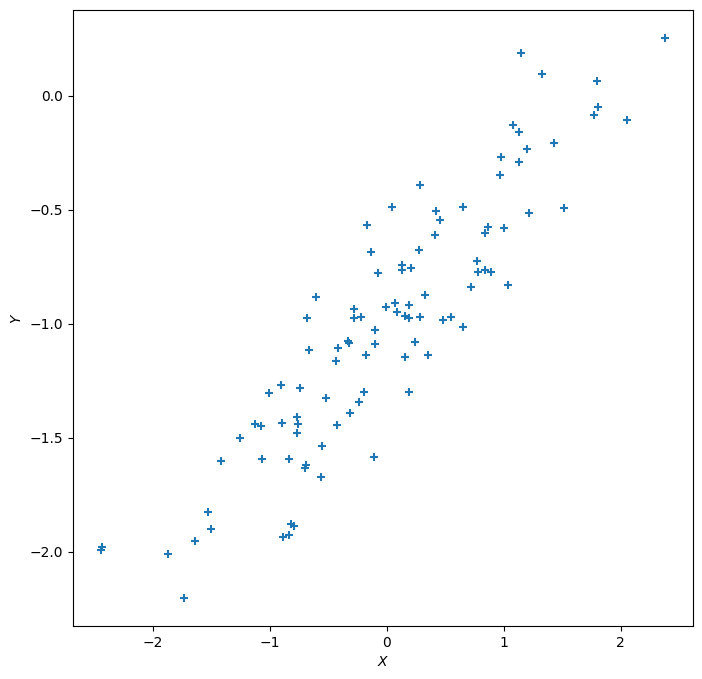

In [112]:
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y, marker='+');
ax.set_xlabel("$X$");
ax.set_ylabel("$Y$");

In [113]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.5
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           2.85e-37
Time:                        21:00:41   Log-Likelihood:              0.0061985
No. Observations:                 100   AIC:                             3.988
Df Residuals:                      98   BIC:                             9.198
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0016      0.024    -40.976      0.000      -1.050      -0.953
x1             0.5275      0.026     20.531      0.000       0.477       0.578
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.785
Skew:                           0.025   Prob(JB):                        0.676
Kurtosis:                       2.569   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Both estimates are quite good, with p-values of 0.

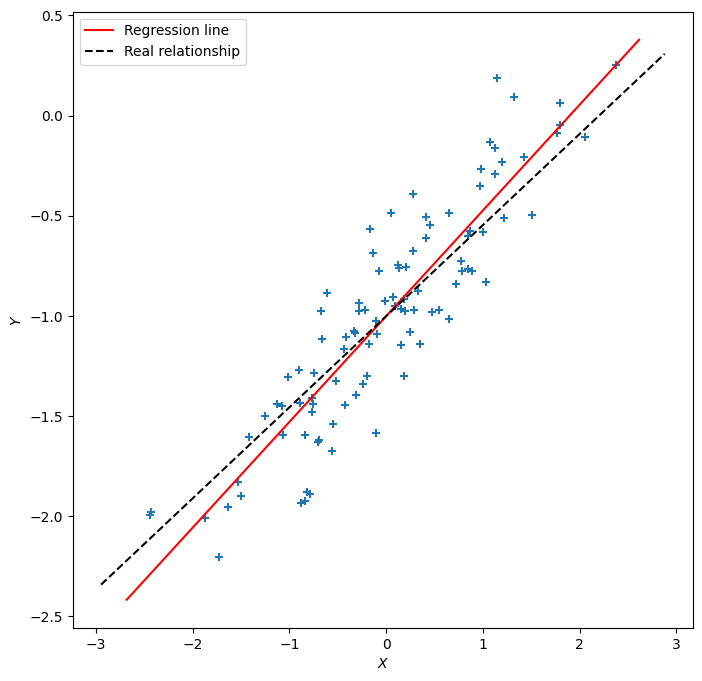

In [114]:
xlim = np.array(ax.get_xlim())
r = results.get_prediction(sm.add_constant(xlim))
Y = -1 + 0.5*xlim

ax.plot(xlim, r.predicted, c='r', label='Regression line')
ax.plot(ax.get_xlim(), Y, c='k', ls='--', label='Real relationship')
ax.legend()
f

In [126]:
df = pd.DataFrame({"y": y, "X": X})
model = sm.OLS.from_formula("y ~ X + np.power(X, 2)", df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           5.68e-36
Time:                        21:11:28   Log-Likelihood:                0.27409
No. Observations:                 100   AIC:                             5.452
Df Residuals:                      97   BIC:                             13.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0143      0.030    -33.572      0.000      -1.074      -0.954
X                  0.5280      0.026     20.494      0.000       0.477       0.579
np.power(X, 2)     0.0141      0.020      0.722      0.472      -0.025       0.053
==============================================================================
Omnibus:                        0.715   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.789
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.579   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As the p value for the degree 2 term shows, the quadratic term is not significant and does not aid the model.

# 14

In [135]:
rng = np.random.default_rng(5)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5*x1 + rng.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + rng.normal(size=100)


array([[1.        , 0.79861815],
       [0.79861815, 1.        ]])

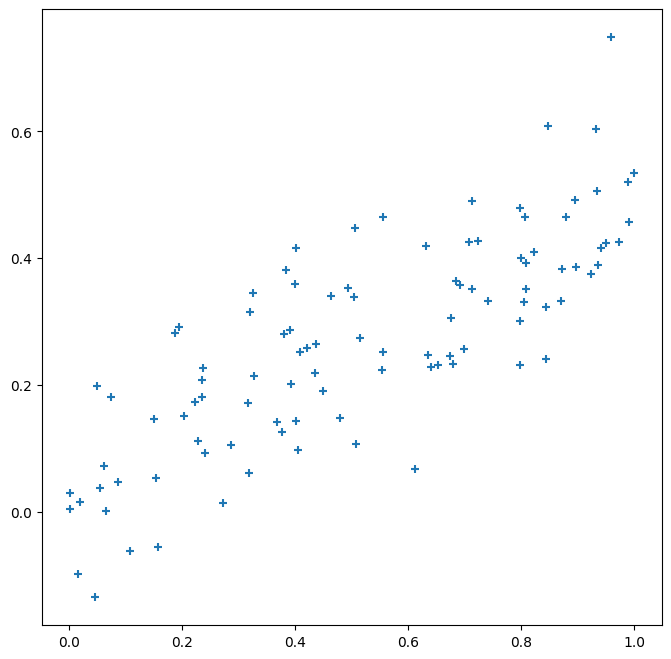

In [136]:
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(x1,x2,marker='+')
np.corrcoef(x1,x2) # = 0.7723245

In [141]:
X = pd.DataFrame({'x1': x1, 'x2': x2})
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     23.89
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           3.68e-09
Time:                        22:31:02   Log-Likelihood:                -136.91
No. Observations:                 100   AIC:                             279.8
Df Residuals:                      97   BIC:                             287.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9414      0.199      9.768      0.000       1.547       2.336
x1             2.0959      0.544      3.850      0.000       1.015       3.176
x2             0.3673      0.967      0.380      0.705      -1.552       2.286
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.573
Skew:                          -0.153   Prob(JB):                        0.751
Kurtosis:                       3.209   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The only null hypothesis we cannot reject is $H_0: \beta_2 = 0$

In [142]:
X = pd.DataFrame({'x1': x1})
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     48.05
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           4.45e-10
Time:                        22:35:14   Log-Likelihood:                -136.98
No. Observations:                 100   AIC:                             278.0
Df Residuals:                      98   BIC:                             283.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9544      0.195     10.028      0.000       1.568       2.341
x1             2.2611      0.326      6.932      0.000       1.614       2.908
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.512
Skew:                          -0.122   Prob(JB):                        0.774
Kurtosis:                       3.252   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Yes we can reject both null hypotheses for the coeff of the constant and the coeff of x1.

In [143]:
X = pd.DataFrame({'x2': x2})
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.88
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           5.22e-07
Time:                        22:36:13   Log-Likelihood:                -144.02
No. Observations:                 100   AIC:                             292.0
Df Residuals:                      98   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2301      0.197     11.343      0.000       1.840       2.620
x2             3.3400      0.622      5.374      0.000       2.107       4.573
==============================================================================
Omnibus:                        1.929   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.713
Skew:                          -0.320   Prob(JB):                        0.425
Kurtosis:                       2.972   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The results do not contradict. What's happening here is a collinearity phenomenon. As suggested by the high correlation values and by the scatter plot (and, of course, from the generation of Y), we can linearly predict x1 from x2 (and vice-versa) with a substantial degree of accuracy. This is a clue of collinearity that is confirmed by the regression model. When both variables are combined in the same linear model, one of them loses explanatory power because the variance it explains is already being explained by the other variable. Accordingly, if considered individually, both variables lead to the rejection of the null hypothesis but, if considered together, one of the variables is dismissable.

#### One thing to add however is that even if this was not a collinearity problem, as we will see in the next part, it is not always the case that you should trust the p-value of an OLS.

In [144]:
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

In [145]:
X = pd.DataFrame({'x1': x1, 'x2': x2})
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     22.13
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.17e-08
Time:                        22:51:42   Log-Likelihood:                -142.13
No. Observations:                 101   AIC:                             290.3
Df Residuals:                      98   BIC:                             298.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9631      0.206      9.515      0.000       1.554       2.372
x1             1.2411      0.479      2.590      0.011       0.290       2.192
x2             2.0217      0.819      2.468      0.015       0.396       3.647
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.795
Skew:                          -0.207   Prob(JB):                        0.672
Kurtosis:                       3.129   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### By adding only 1 point (you had 100 observations prior) now the p-value is telling you that both values are significant, which is very suspect. Moreover, if its telling you that both values are significant, you would expect that the coefficient estimates would be accurate, but they are far from accurate. 

Outlier and high leverage analysis LFL

# 15